In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

from effsim.paramgen import uniform_param_generator
from effsim.paramgen import distribution_param_generator
from effsim.effsim import EventSimulator
from effsim.effsim import NoiseMaker

from pytpc.hdfdata import HDFDataFile

import pytpc
from pytpc.tpcplot import pad_plot, chamber_plot
from pytpc.constants import degrees, pi

import csv
import yaml
import h5py

/home/chen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# read data from file - paths changed to /home/chen
with open('/home/chen/config_e15503a_runs_92-104.yml', 'r') as f:
    config = yaml.load(f)
    
# Extract parameters from test data
beam_enu0 = config['beam_enu0']
beam_mass = config['beam_mass']
beam_charge = config['beam_charge']
mass_num = config['mass_num']
max_beam_angle = (config['max_beam_angle']*math.pi)/180
beam_origin_z = config['beam_origin_z']
gas = pytpc.gases.InterpolatedGas('isobutane', 19.2)

# create & observe a single event
num_evts = 1000
#print(config)

In [4]:
pgen = uniform_param_generator(beam_enu0, beam_mass, beam_charge, mass_num, max_beam_angle, beam_origin_z, gas, num_evts, z0=0.5)

In [15]:
p = next(pgen)
print(p)

(array([-1.04543465e-02, -4.72172487e-03,  5.00000000e-01,  7.98933504e+00,
        4.21814499e+00,  2.92151536e+00]), array([-0.01633229, -0.00737651, -0.99983941]))


In [16]:
sim = EventSimulator(config)

In [17]:
evtClean, ctr = sim.make_event(p[0][0], p[0][1], p[0][2], p[0][3], p[0][4], p[0][5])

In [18]:
print(len(evtClean))

58


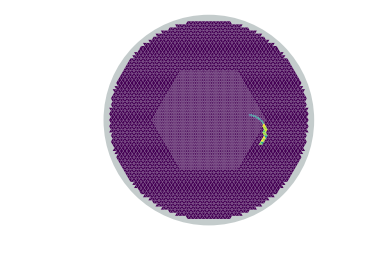

In [19]:
hits = np.zeros(10240)
for k, v in evtClean.items():
    hits[k] += v.max()
        
fig, sm = pad_plot(hits, scale='linear', cmap='viridis')